In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Spellman.csv")  
df_numeric = df.iloc[:, 1:] 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [35]:
df.isna().sum().sort_values(ascending=False)

time              0
40                0
50                0
60                0
70                0
80                0
90                0
100               0
110               0
120               0
130               0
140               0
150               0
160               0
170               0
180               0
190               0
200               0
210               0
220               0
230               0
240               0
250               0
260               0
KMeans_Cluster    0
DBSCAN_Cluster    0
Agglo_Cluster     0
dtype: int64

In [36]:
len(df)

4381

In [37]:
df.dropna(inplace=True) 
df.isna().sum().sort_values(ascending=False)

time              0
40                0
50                0
60                0
70                0
80                0
90                0
100               0
110               0
120               0
130               0
140               0
150               0
160               0
170               0
180               0
190               0
200               0
210               0
220               0
230               0
240               0
250               0
260               0
KMeans_Cluster    0
DBSCAN_Cluster    0
Agglo_Cluster     0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

Feature Extraction & Engineering

In [39]:
df.head()

,time,40,50,60,70,80,90,100,110,120,...,200,210,220,230,240,250,260,KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,-0.09,-0.44,0.31,0.03,0.57,0.00,0.010,0,-1,0
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,-0.04,0.13,-0.06,-0.26,-0.10,0.27,0.235,1,-1,1
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,-0.15,0.03,-0.26,-0.34,-0.34,0.25,0.190,1,-1,2
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,0.49,-0.43,0.80,-0.47,1.01,-0.36,-0.405,0,-1,0
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,0.54,-0.09,1.03,0.08,0.57,-0.26,-0.310,0,-1,0


In [40]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object'] 
categorical_cols

['time']

In [41]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

time
YPR204W      1
YAL001C      1
YAL014C      1
YAL016W      1
YAL020C      1
            ..
YAL065C      1
YAL064W-B    1
YAL063C      1
YAL056W      1
YAL051W      1
Name: count, Length: 4381, dtype: int64
--------------------------------------------------


In [42]:
# periksa apakah kolom 'NumberOffriends' ada di dalam DataFrame
if 'time' not in df.columns:
    df['time'] = np.nan  # or any default value you prefer

df['time'] = df['time'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single', 'Together': 'Married', 'Married': 'Married'})

In [43]:
df.columns

Index(['time', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130',
       '140', '150', '160', '170', '180', '190', '200', '210', '220', '230',
       '240', '250', '260', 'KMeans_Cluster', 'DBSCAN_Cluster',
       'Agglo_Cluster'],
      dtype='object')

C:\Users\kipli\AppData\Local\Temp\ipykernel_5568\4207927413.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time'].fillna('Unknown', inplace=True)


time
YPR204W      1
YAL001C      1
YAL014C      1
YAL016W      1
YAL020C      1
            ..
YAL065C      1
YAL064W-B    1
YAL063C      1
YAL056W      1
YAL051W      1
Name: count, Length: 4381, dtype: int64


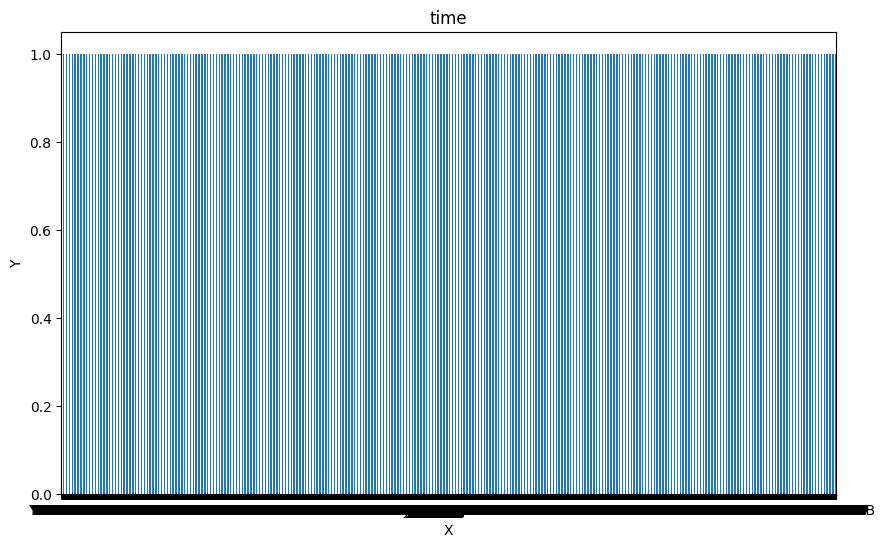

In [44]:

if 'time' not in df.columns:
	df['time'] = np.nan

df['time'].fillna('Unknown', inplace=True)

marital_status_counts = df['time'].value_counts()

print(marital_status_counts)

plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar')
plt.title('time')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(rotation=0)
plt.show()

In [45]:
df['time'] = df['time'].replace({'2n Cycle' : 'Master'})

In [46]:
df

,time,40,50,60,70,80,90,100,110,120,...,200,210,220,230,240,250,260,KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,-0.09,-0.44,0.31,0.03,0.57,0.00,0.010,0,-1,0
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,-0.04,0.13,-0.06,-0.26,-0.10,0.27,0.235,1,-1,1
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,-0.15,0.03,-0.26,-0.34,-0.34,0.25,0.190,1,-1,2
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,0.49,-0.43,0.80,-0.47,1.01,-0.36,-0.405,0,-1,0
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,0.54,-0.09,1.03,0.08,0.57,-0.26,-0.310,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,YPR198W,-0.060,0.08,0.210,0.34,0.65,-0.26,0.14,-0.33,0.53,...,0.53,-0.17,0.59,-0.96,0.40,-0.23,-0.325,0,-1,0
4377,YPR199C,0.155,0.19,0.235,0.28,-0.26,0.21,-0.40,0.34,-0.80,...,-0.06,0.13,-0.44,-1.03,0.14,0.30,0.250,1,-1,2
4378,YPR201W,-0.255,-0.36,-0.300,-0.24,1.30,-0.07,0.29,-0.20,0.25,...,1.04,-0.32,0.80,-0.13,0.84,-0.39,-0.415,0,-1,0
4379,YPR203W,0.570,0.12,-0.070,-0.26,-0.44,-0.21,-1.08,0.39,-0.17,...,-0.81,-0.34,-1.21,-1.36,-0.12,0.69,0.555,3,-1,3


In [47]:
df.sample(2, random_state=42)

,time,40,50,60,70,80,90,100,110,120,...,200,210,220,230,240,250,260,KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster
175,YBR248C,0.40,0.35,0.020,-0.31,-0.42,0.10,-0.31,0.27,-0.46,...,-0.11,0.10,0.05,0.39,-0.35,0.54,0.485,1,-1,2
2886,YLR231C,-0.37,-0.41,-0.225,-0.04,0.35,-0.03,0.30,-0.03,0.26,...,0.15,0.02,-0.03,-0.23,0.25,0.03,-0.055,0,-1,3


In [48]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object'] 

numeric_cols


['40',
 '50',
 '60',
 '70',
 '80',
 '90',
 '100',
 '110',
 '120',
 '130',
 '140',
 '150',
 '160',
 '170',
 '180',
 '190',
 '200',
 '210',
 '220',
 '230',
 '240',
 '250',
 '260',
 'KMeans_Cluster',
 'DBSCAN_Cluster',
 'Agglo_Cluster']

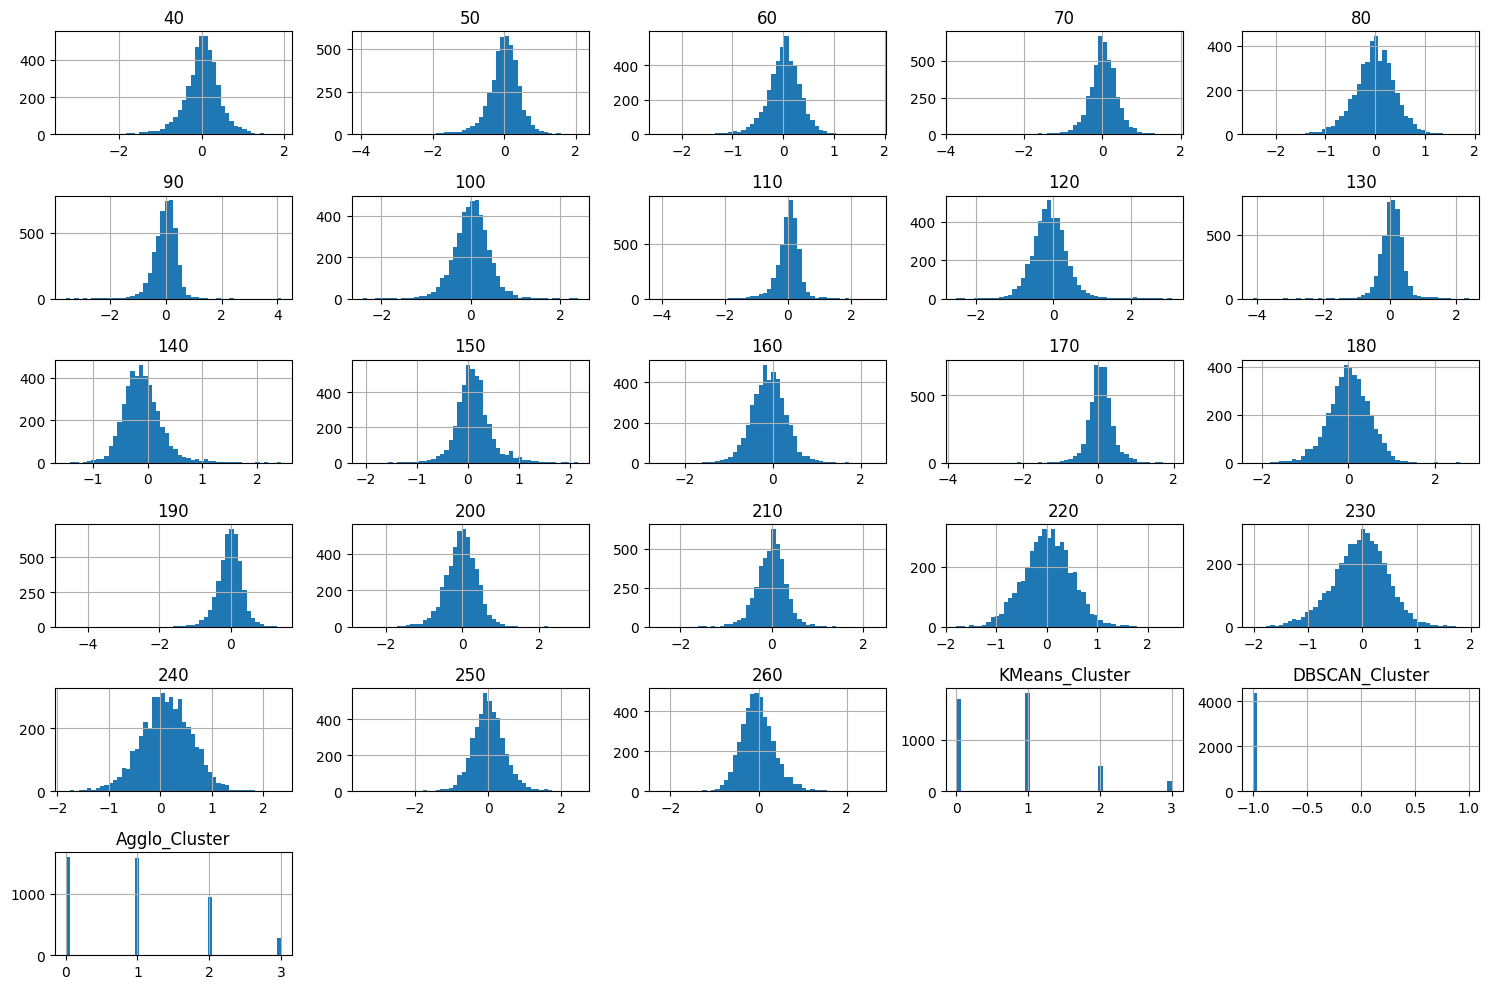

In [49]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

Cluster mengoptimalkan untuk K-means

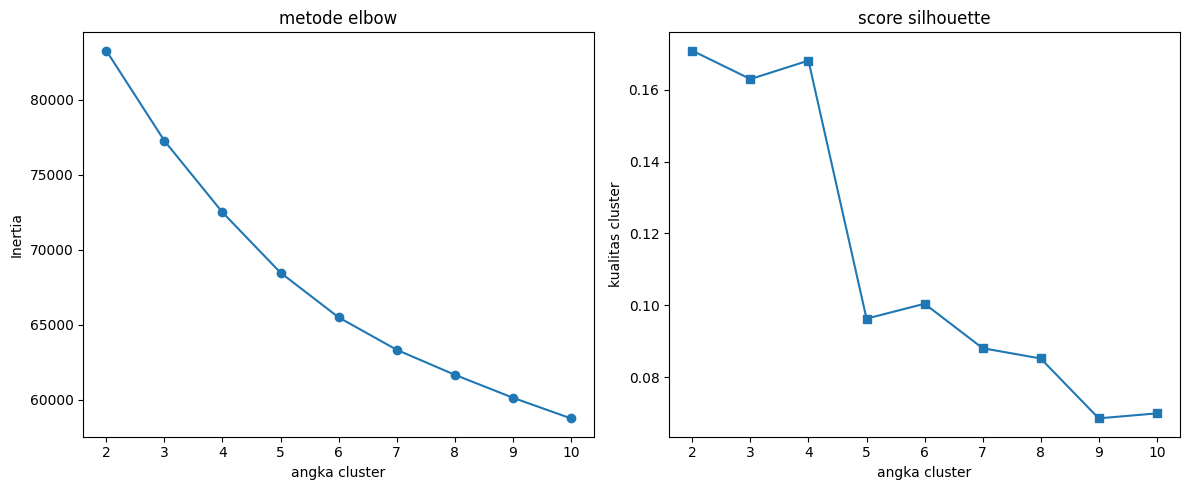

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('angka cluster')
plt.ylabel('Inertia')
plt.title('metode elbow')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel('angka cluster')
plt.ylabel('kualitas cluster')
plt.title('score silhouette')
plt.tight_layout()
plt.show()

Clustering dengan K-means, DBSCAN, dan Agglomerative

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

optimal_k = 4 

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

dbscan = DBSCAN(eps=1.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

agglo = AgglomerativeClustering(n_clusters=optimal_k)
df["Agglo_Cluster"] = agglo.fit_predict(df_scaled)



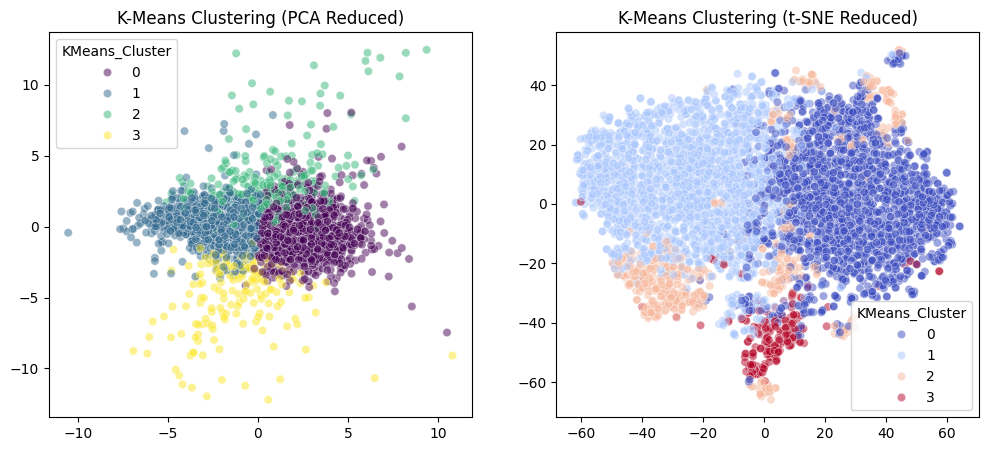

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["KMeans_Cluster"], palette="viridis", alpha=0.5)
plt.title("K-Means Clustering (PCA Reduced)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=df["KMeans_Cluster"], palette="coolwarm", alpha=0.5)
plt.title("K-Means Clustering (t-SNE Reduced)")

plt.show()

In [61]:
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_tsne = pd.DataFrame(df_tsne, columns=["t-SNE1", "t-SNE2"])


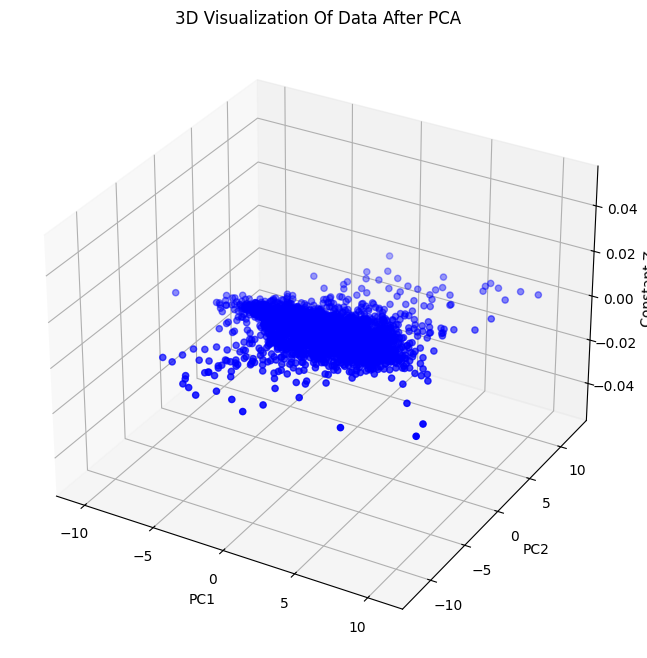

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Pastikan df_pca adalah DataFrame yang berisi hasil PCA dengan kolom 'PC1' dan 'PC2'
# Contoh:
# df_pca = pd.DataFrame({'PC1': [1, 2, 3], 'PC2': [4, 5, 6]})

# Ambil nilai PC1 dan PC2
x, y = df_pca['PC1'], df_pca['PC2']
z = np.zeros_like(x)  # Set z to a constant value

# Buat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="blue", marker="o")
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Constant Z')

# Tampilkan plot
plt.show()

In [64]:
df['Cluster Kmeans'] = df['KMeans_Cluster']  # meletakkan hasil clustering ke dalam DataFrame

In [65]:
df

,time,40,50,60,70,80,90,100,110,120,...,210,220,230,240,250,260,KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster,Cluster Kmeans
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,-0.44,0.31,0.03,0.57,0.00,0.010,0,-1,0,0
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,0.13,-0.06,-0.26,-0.10,0.27,0.235,1,-1,1,1
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,0.03,-0.26,-0.34,-0.34,0.25,0.190,1,-1,2,1
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,-0.43,0.80,-0.47,1.01,-0.36,-0.405,0,-1,0,0
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,-0.09,1.03,0.08,0.57,-0.26,-0.310,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,YPR198W,-0.060,0.08,0.210,0.34,0.65,-0.26,0.14,-0.33,0.53,...,-0.17,0.59,-0.96,0.40,-0.23,-0.325,0,-1,0,0
4377,YPR199C,0.155,0.19,0.235,0.28,-0.26,0.21,-0.40,0.34,-0.80,...,0.13,-0.44,-1.03,0.14,0.30,0.250,1,-1,2,1
4378,YPR201W,-0.255,-0.36,-0.300,-0.24,1.30,-0.07,0.29,-0.20,0.25,...,-0.32,0.80,-0.13,0.84,-0.39,-0.415,0,-1,0,0
4379,YPR203W,0.570,0.12,-0.070,-0.26,-0.44,-0.21,-1.08,0.39,-0.17,...,-0.34,-1.21,-1.36,-0.12,0.69,0.555,3,-1,3,3
